In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = data.drop('customerID', axis =1)

In [3]:
X = data.drop('Churn', axis= 1)
y = data.Churn

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Customer Id is not important

In [6]:
x_train, x_test = train_test_split(data, test_size=0.1419, random_state=42)
x_train.shape, x_test.shape

((6043, 20), (1000, 20))

##### Total Charges has some empty values 

In [7]:
idx = x_train[x_train.TotalCharges == ' '].index
x_train = x_train.drop(idx)

In [8]:
idx = x_test[x_test.TotalCharges == ' '].index
x_test = x_test.drop(idx)

In [9]:
x_train.TotalCharges = pd.to_numeric(x_train.TotalCharges)
x_test.TotalCharges = pd.to_numeric(x_test.TotalCharges)

In [10]:
x_train = x_train.reset_index(drop= True)
x_test = x_test.reset_index(drop= True)

In [11]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
1,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
2,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,No
3,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
4,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
995,Male,1,Yes,No,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.15,2231.05,Yes
996,Male,0,No,No,14,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.75,712.75,Yes
997,Male,0,No,No,55,Yes,No,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Electronic check,59.20,3175.85,No


In [12]:
internet = pd.get_dummies(x_train.InternetService, prefix= 'Net', prefix_sep='_')
payment = pd.get_dummies(x_train.PaymentMethod)
contract = pd.get_dummies(x_train.Contract)

In [13]:
x_train = x_train.drop(['InternetService','PaymentMethod', 'Contract'], axis=1)
x_train = pd.concat([x_train, internet, payment, contract], axis=1)

In [14]:
internet = pd.get_dummies(x_test.InternetService, prefix= 'Net', prefix_sep='_')
payment = pd.get_dummies(x_test.PaymentMethod)
contract = pd.get_dummies(x_test.Contract)

In [15]:
x_test = x_test.drop(['InternetService','PaymentMethod', 'Contract'], axis=1)
x_test = pd.concat([x_test, internet, payment, contract], axis=1)

In [16]:
x_test.shape

(999, 27)

In [17]:
x_train.shape

(6033, 27)

In [18]:
a = pd.get_dummies(x_train.DeviceProtection, prefix= 'DeviceProtection', prefix_sep='_')
b = pd.get_dummies(x_train.OnlineBackup, prefix= 'OnlineBackup', prefix_sep='_')
c = pd.get_dummies(x_train.OnlineSecurity, prefix= 'OnlineSecurity', prefix_sep='_')
d  =pd.get_dummies(x_train.TechSupport, prefix= 'TechSupport', prefix_sep='_')

In [19]:
x_train = x_train.drop(['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'TechSupport'], axis=1)
x_train = pd.concat([x_train, a, b ,c, d], axis=1)

In [20]:
a = pd.get_dummies(x_test.DeviceProtection, prefix= 'DeviceProtection', prefix_sep='_')
b = pd.get_dummies(x_test.OnlineBackup, prefix= 'OnlineBackup', prefix_sep='_')
c = pd.get_dummies(x_test.OnlineSecurity, prefix= 'OnlineSecurity', prefix_sep='_')
d  =pd.get_dummies(x_test.TechSupport, prefix= 'TechSupport', prefix_sep='_')

In [21]:
x_test = x_test.drop(['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'TechSupport'], axis=1)
x_test = pd.concat([x_test, a, b ,c, d], axis=1)

##### Encoding the categorical Variables

In [22]:
encoder = LabelEncoder()

In [23]:
for col in x_train:
    if x_train[col].dtype == object:
        x_train[col] = encoder.fit_transform(x_train[col])

In [24]:
for col in x_test:
    if x_test[col].dtype == object:
        encoder.fit(x_test[col])
        x_test[col] = encoder.transform(x_test[col])

In [25]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,...,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,41,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,0,0,1,1,52,1,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
4,1,0,0,0,67,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,1,1,25,1,0,1,1,1,...,0,0,1,0,0,1,0,0,1,0
995,1,1,1,0,24,1,0,2,2,1,...,1,1,0,0,1,0,0,1,0,0
996,1,0,0,0,14,0,1,2,2,1,...,1,1,0,0,1,0,0,1,0,0
997,1,0,0,0,55,1,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1


##### Categorizing the numerical value

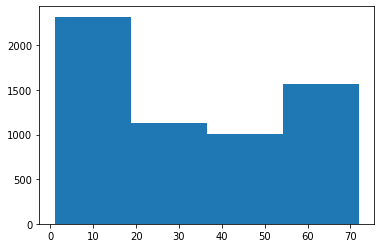

In [26]:
plt.hist(x_train.tenure, bins= 4, histtype = 'bar')
plt.show()

In [27]:
tensure_cat= pd.cut(x_train['tenure'], bins=4, labels=["ten1-18", "ten19-36", "ten37-54", "ten55-72"])
tensure_cat.value_counts()

ten1-18     2322
ten55-72    1566
ten19-36    1133
ten37-54    1012
Name: tenure, dtype: int64

In [28]:
tensure_cat = pd.get_dummies(tensure_cat)

In [29]:
x_train = pd.concat([x_train, tensure_cat], axis =1)

In [30]:
tensure_cat= pd.cut(x_test['tenure'], bins=4, labels=["ten1-18", "ten19-36", "ten37-54", "ten55-72"])
tensure_cat.value_counts()

ten1-18     401
ten55-72    253
ten19-36    175
ten37-54    170
Name: tenure, dtype: int64

In [31]:
tensure_cat = pd.get_dummies(tensure_cat)
x_test = pd.concat([x_test, tensure_cat], axis =1)

In [32]:
x_train = x_train.drop('tenure', axis= 1)
x_test = x_test.drop('tenure', axis= 1)

In [33]:
x_train.to_csv('feature_x_train.csv', index= False)
x_test.to_csv('feature_x_test.csv', index= False)

In [34]:
x_train.shape

(6033, 38)

In [35]:
x_test.shape

(999, 38)